# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 2
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(10000, 32, 32, 3)
(10000, 2)
(2000, 32, 32, 3)
(2000, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


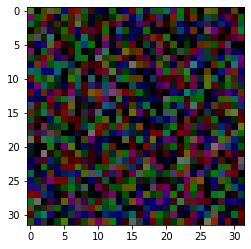

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

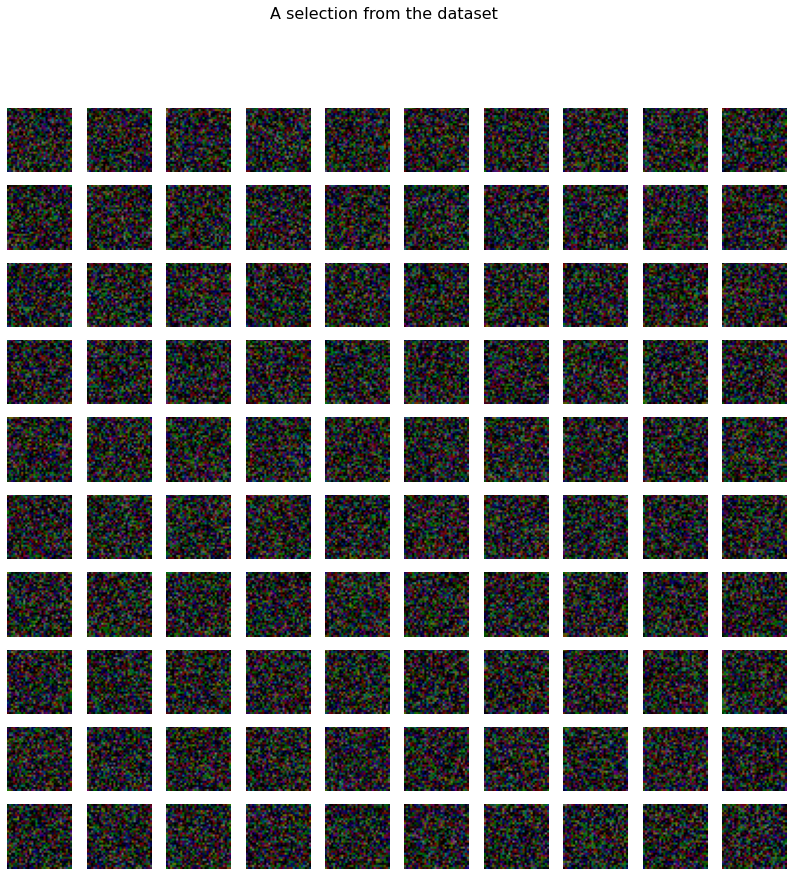

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 10s 71ms/step - loss: 0.6932 - accuracy: 0.5020
test loss, test acc: [0.6932423114776611, 0.5019999742507935]
Evaluate on test data
4/4 [==============================] - 1s 415ms/step - loss: 0.6932 - accuracy: 0.4995
test loss, test acc: [0.6932401061058044, 0.49950000643730164]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
100/100 [==============================] - 5s 33ms/step - loss: 0.6942 - accuracy: 0.4929 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/250
100/100 [==============================] - 3s 30ms/step - loss: 0.6934 - accuracy: 0.5025 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/250
100/100 [==============================] - 3s 30ms/step - loss: 0.6930 - accuracy: 0.5078 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/250
100/100 [==============================] - 3s 31ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/250
100/100 [==============================] - 3s 32ms/step - loss: 0.6924 - accuracy: 0.5186 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 6/250
100/100 [==============================] - 3s 30ms/step - loss: 0.6924 - accuracy: 0.5176 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/250
100/100 [==============================] - 3s 30ms/step - loss: 0.6921 - accuracy: 0.5218 - val_loss: 0.6933 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 1s 29ms/step - loss: 7.8328e-07 - accuracy: 1.0000
test loss, test acc: [7.83284917815763e-07, 1.0]
Evaluate on test data
4/4 [==============================] - 0s 29ms/step - loss: 5.3374 - accuracy: 0.4685
test loss, test acc: [5.337418556213379, 0.4684999883174896]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 1s 10ms/step - loss: 18.9921 - accuracy: 0.5000
test loss, test acc: [18.99210548400879, 0.5]
Evaluate on test data
4/4 [==============================] - 0s 43ms/step - loss: 18.8735 - accuracy: 0.5000
test loss, test acc: [18.873483657836914, 0.5]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
100/100 [==============================] - 2s 9ms/step - loss: 6.6984 - accuracy: 0.4981 - val_loss: 0.8127 - val_accuracy: 0.4980
Epoch 2/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0434 - accuracy: 0.5060 - val_loss: 0.6981 - val_accuracy: 0.4725
Epoch 3/250
100/100 [==============================] - 1s 7ms/step - loss: 0.7358 - accuracy: 0.4943 - val_loss: 0.6942 - val_accuracy: 0.4810
Epoch 4/250
100/100 [==============================] - 1s 7ms/step - loss: 0.7084 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.4935
Epoch 5/250
100/100 [==============================] - 1s 7ms/step - loss: 0.7022 - accuracy: 0.5142 - val_loss: 0.6932 - val_accuracy: 0.4795
Epoch 6/250
100/100 [==============================] - 1s 7ms/step - loss: 0.6985 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 7/250
100/100 [==============================] - 1s 7ms/step - loss: 0.6982 - accuracy: 0.4958 - val_loss: 0.6930 - val_accuracy: 0.4920

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 0s 6ms/step - loss: 0.0505 - accuracy: 1.0000
test loss, test acc: [0.05053827911615372, 1.0]
Evaluate on test data
4/4 [==============================] - 0s 7ms/step - loss: 0.9111 - accuracy: 0.5090
test loss, test acc: [0.9110596179962158, 0.5090000033378601]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 2s 57ms/step - loss: 0.8017 - accuracy: 0.4940
test loss, test acc: [0.8016937971115112, 0.49399998784065247]
Evaluate on test data
4/4 [==============================] - 1s 246ms/step - loss: 0.8115 - accuracy: 0.4780
test loss, test acc: [0.8114784955978394, 0.4779999852180481]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
100/100 [==============================] - 6s 43ms/step - loss: 0.9169 - accuracy: 0.5076 - val_loss: 0.7050 - val_accuracy: 0.4920
Epoch 2/250
100/100 [==============================] - 4s 39ms/step - loss: 0.6382 - accuracy: 0.6357 - val_loss: 0.7131 - val_accuracy: 0.5110
Epoch 3/250
100/100 [==============================] - 4s 40ms/step - loss: 0.4668 - accuracy: 0.7898 - val_loss: 0.7546 - val_accuracy: 0.4915
Epoch 4/250
100/100 [==============================] - 4s 40ms/step - loss: 0.3136 - accuracy: 0.8902 - val_loss: 0.8227 - val_accuracy: 0.5045
Epoch 5/250
100/100 [==============================] - 4s 40ms/step - loss: 0.1993 - accuracy: 0.9481 - val_loss: 0.8989 - val_accuracy: 0.5085
Epoch 6/250
100/100 [==============================] - 4s 40ms/step - loss: 0.1295 - accuracy: 0.9725 - val_loss: 0.9812 - val_accuracy: 0.5125
Epoch 7/250
100/100 [==============================] - 4s 40ms/step - loss: 0.0868 - accuracy: 0.9853 - val_loss: 1.0538 - val_accuracy:

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 1s 38ms/step - loss: 0.0018 - accuracy: 0.9994
test loss, test acc: [0.0017531770281493664, 0.9994000196456909]
Evaluate on test data
4/4 [==============================] - 0s 39ms/step - loss: 2.8640 - accuracy: 0.5020
test loss, test acc: [2.864032745361328, 0.5019999742507935]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 5s 103ms/step - loss: 0.8306 - accuracy: 0.5014
test loss, test acc: [0.8305975794792175, 0.5013999938964844]
Evaluate on test data
4/4 [==============================] - 2s 668ms/step - loss: 0.8299 - accuracy: 0.4995
test loss, test acc: [0.8299075961112976, 0.49950000643730164]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
100/100 [==============================] - 6s 42ms/step - loss: 0.7266 - accuracy: 0.5029 - val_loss: 0.6948 - val_accuracy: 0.4955
Epoch 2/250
100/100 [==============================] - 4s 39ms/step - loss: 0.6948 - accuracy: 0.5034 - val_loss: 0.6934 - val_accuracy: 0.5065
Epoch 3/250
100/100 [==============================] - 4s 39ms/step - loss: 0.6933 - accuracy: 0.5073 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 4/250
100/100 [==============================] - 4s 40ms/step - loss: 0.6939 - accuracy: 0.4965 - val_loss: 0.6934 - val_accuracy: 0.4985
Epoch 5/250
100/100 [==============================] - 4s 40ms/step - loss: 0.6942 - accuracy: 0.4935 - val_loss: 0.6934 - val_accuracy: 0.4995
Epoch 6/250
100/100 [==============================] - 4s 40ms/step - loss: 0.6934 - accuracy: 0.4973 - val_loss: 0.6934 - val_accuracy: 0.4905
Epoch 7/250
100/100 [==============================] - 4s 40ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6934 - val_accuracy:

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
20/20 [==============================] - 1s 45ms/step - loss: 8.8355e-04 - accuracy: 1.0000
test loss, test acc: [0.0008835546323098242, 1.0]
Evaluate on test data
4/4 [==============================] - 0s 45ms/step - loss: 2.1526 - accuracy: 0.5140
test loss, test acc: [2.152635097503662, 0.5139999985694885]


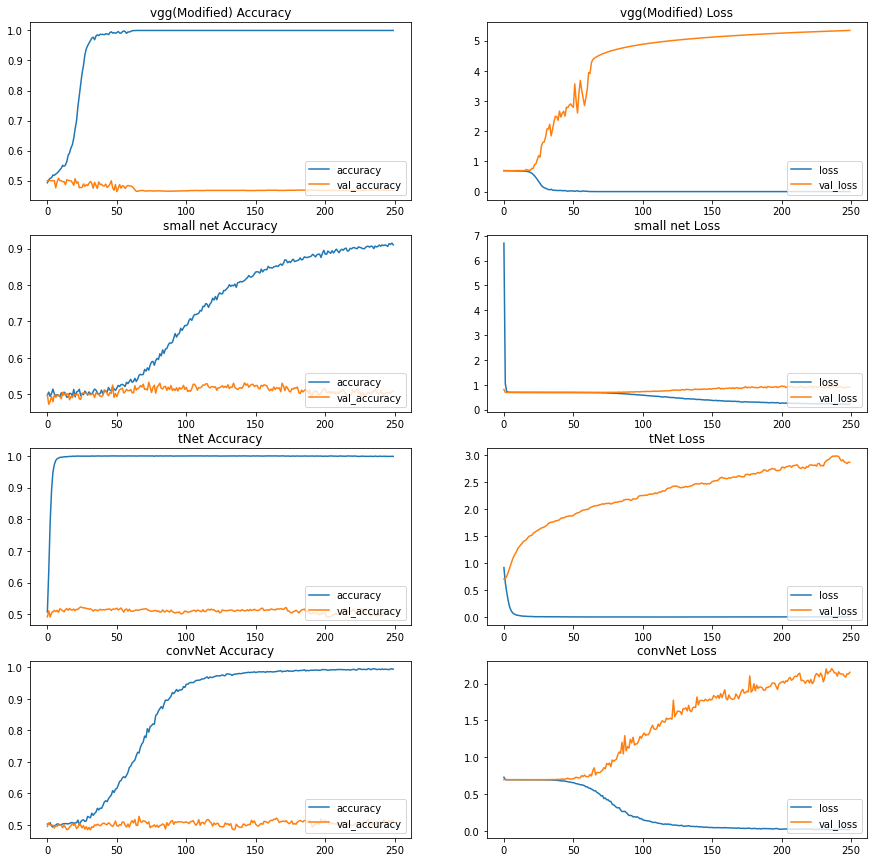

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
